## Lab Title : Boston dataset Analysis

## Project Objective : 
####                                          Analysing boston dataset for lasso and ridge regression

## Steps and Tasks :

### Step 1 : Reading and understanding of data

### Step 2 : Data cleaning and Preparation

### Step 3 : Visualizing the data

### Step 4 : Train-Test Split and feature scaling

### Step 5 : Model Building

### Step 6 : Accuracy and Evaluation

## Step 1 : Reading and understanding of data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0    CRIM       506 non-null    float64
 1     ZN        506 non-null    float64
 2   INDUS       506 non-null    float64
 3   CHAS        506 non-null    int64  
 4    NOX        506 non-null    float64
 5    RM         506 non-null    float64
 6    AGE        506 non-null    float64
 7   DIS         506 non-null    float64
 8   RAD         506 non-null    int64  
 9   TAX         506 non-null    float64
 10  PTRATIO     506 non-null    float64
 11  B           506 non-null    float64
 12  LSTAT       506 non-null    float64
 13   MEDV       506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Step 2 : Data cleaning and Preparation


In [7]:
df.isnull().sum()

 CRIM         0
  ZN          0
INDUS         0
CHAS          0
 NOX          0
 RM           0
 AGE          0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
 MEDV         0
dtype: int64

In [8]:
# Check for duplicate values
df.duplicated().sum()

0

## Step 3 : Visualizing the data

In [13]:
# Check for corelation between data
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_boston.corr(), annot=True)

SyntaxError: invalid non-printable character U+00A0 (282890612.py, line 3)

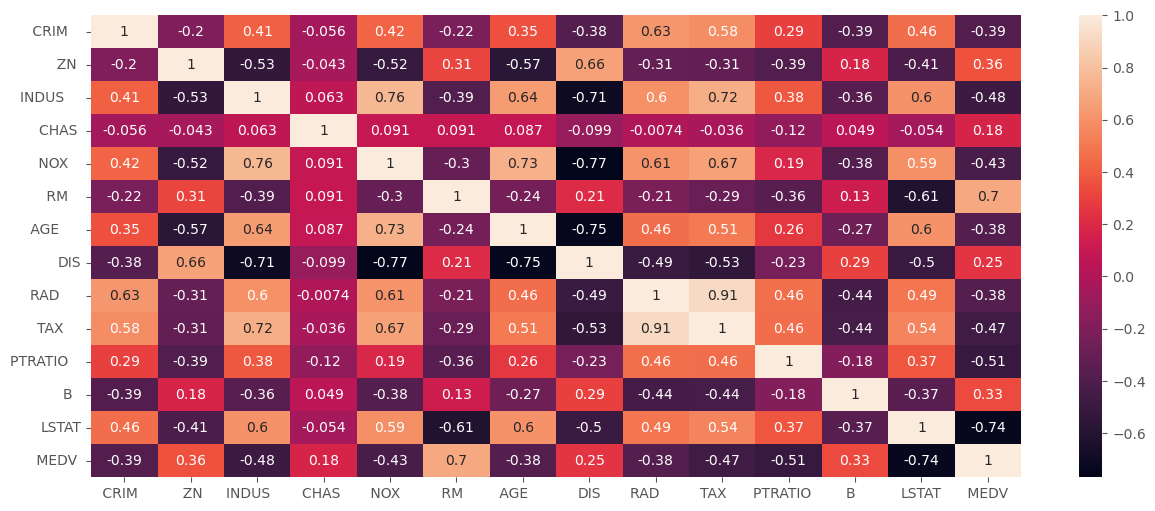

In [10]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

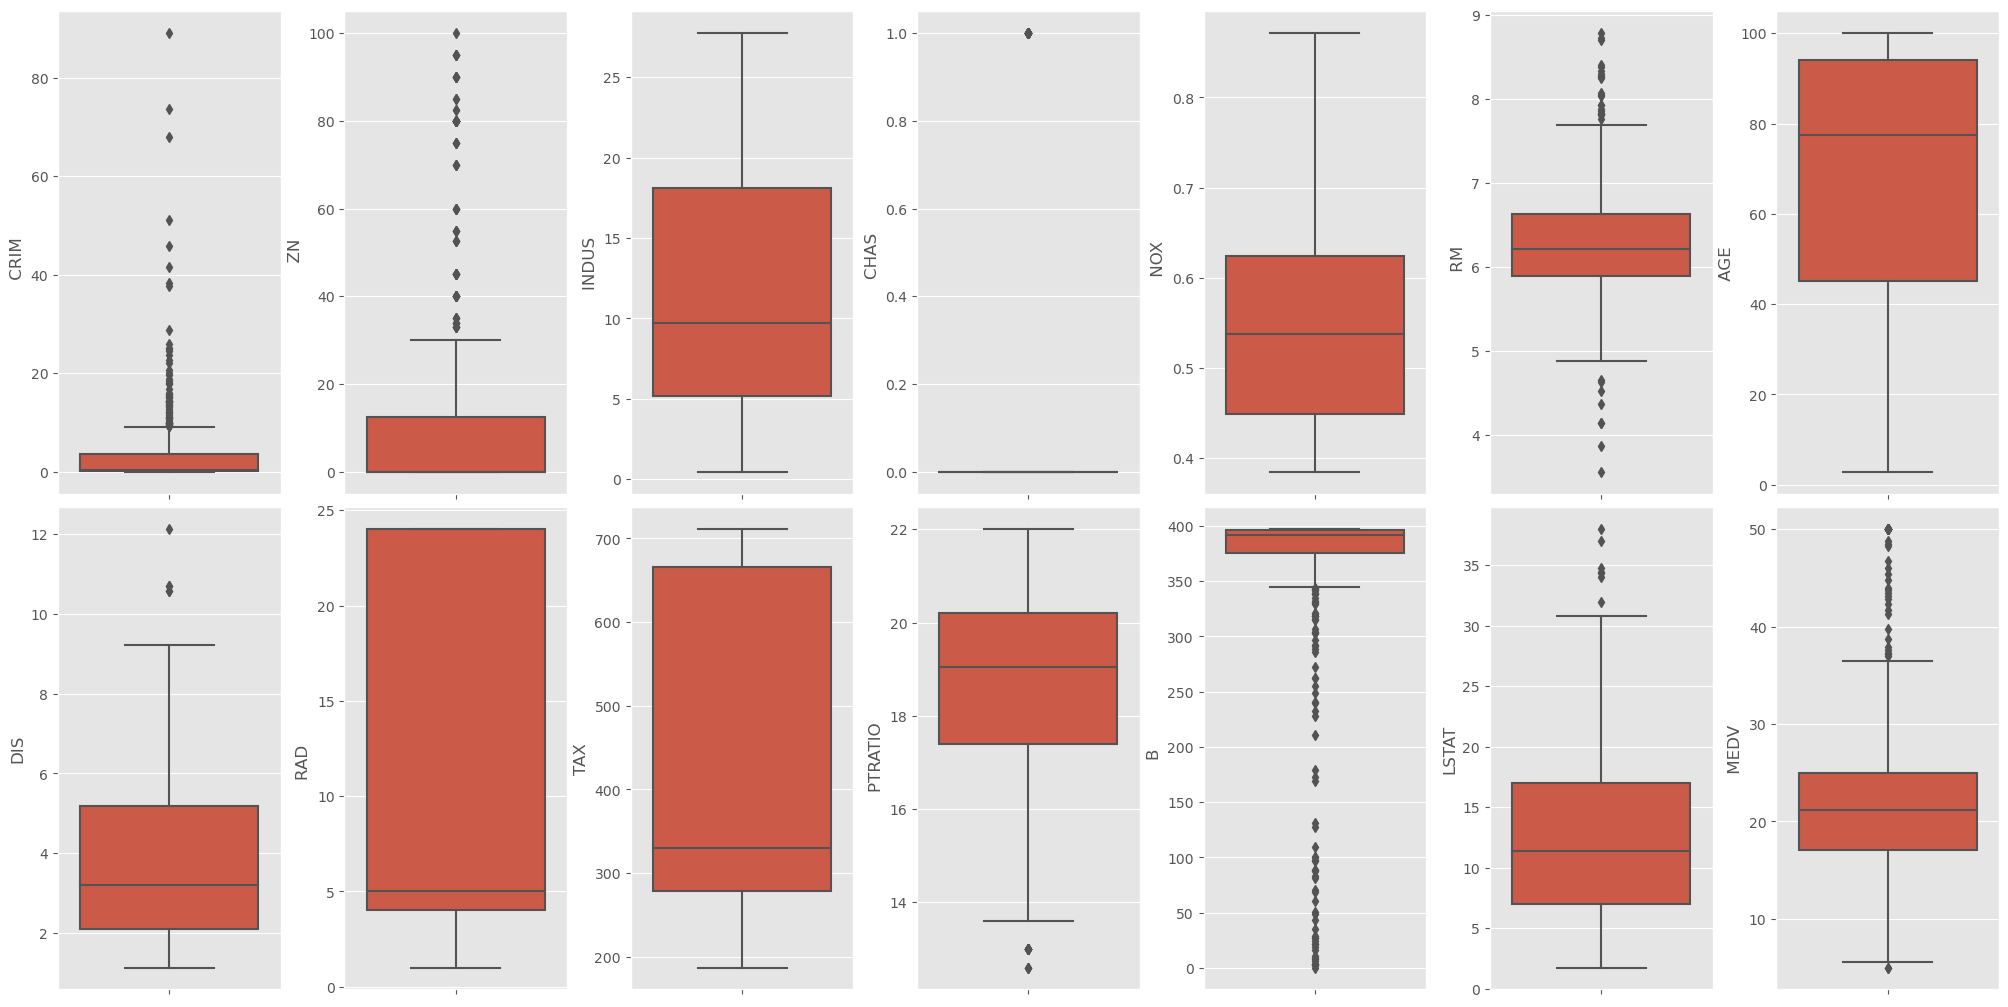

In [15]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5)

In [16]:
# Slice the dataframe into features and target
df_boston_features = df.iloc[:, :-1]
df_boston_target = df.iloc[:,-1:]

In [17]:
# Spliting dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_boston_features, df_boston_target, train_size = 0.8, random_state=111)

In [18]:
# Find the number of rows and columns
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [30]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=df.columns[:-1])
X_test = pd.DataFrame(scaler.transform(X_test), columns=df.columns[:-1])

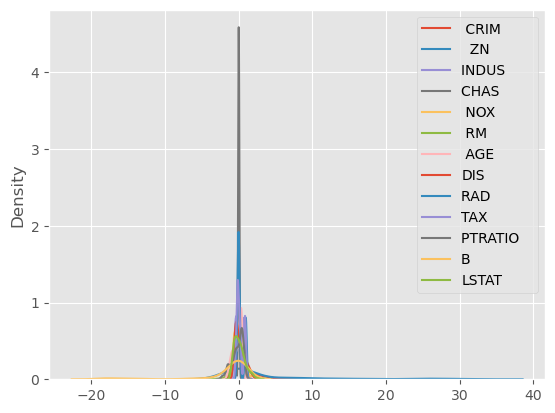

In [31]:
for i in range(len(df.columns[:-1])):
    sns.kdeplot(X_train[df.columns[i]], label = df.columns[i])
    
plt.xlabel("")
plt.legend()

## Step 6 : Model Building

### Ridge Regression

In [33]:

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# Create and train Lasso regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, Y_train)



Ridge()

In [34]:
# Make predictions
ridge_pred = ridge_model.predict(X_test)

In [35]:
# Evaluate the models
ridge_prediction_df = pd.DataFrame(data = ridge_pred, columns=['Predicted rates'])

ridge_prediction_df['Actual rates'] = Y_test.values

ridge_prediction_df.head()

,Predicted rates,Actual rates
0,29.190664,25.0
1,29.157416,30.1
2,31.715947,30.8
3,20.235850,20.5
4,42.009327,48.5


In [36]:
# Printing intercept
print(ridge_model.intercept_)

[22.63602394]


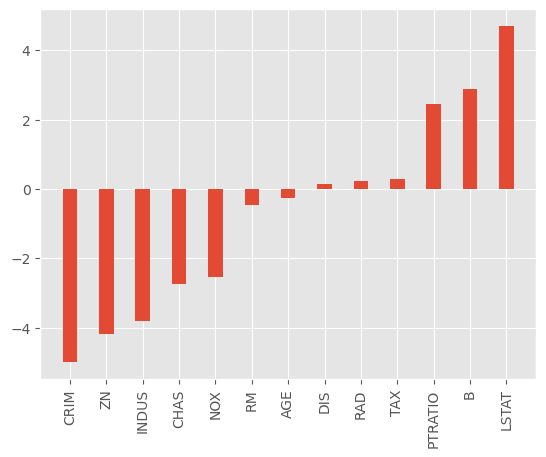

In [37]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
ridge_coef = [-0.25291946,  0.15197465,  0.27604534,  2.45129327, -2.73033591,  2.87737035,  -0.45548257, -4.17993941,  4.68621419,
        -3.80956884, -2.52275102,  0.22820584,  -4.98930303]
ridge_coef.sort()
plt.bar(col_names, ridge_coef, width=0.4)
plt.xticks(rotation = 'vertical')
plt.show()

### Building Lasso Regression model for alpha = 0.5¶

In [44]:
# Initialize the regressor with default alpha value (alpha = 0.5)
reg_ridge = Ridge(alpha =0.5)

# Fit the model to train set
reg_ridge.fit(X_train, Y_train)

# Predict values
ridge_pred_alpha_mod = reg_ridge.predict(X_test)

ridge_prediction_df_alpha_mod = pd.DataFrame(data = ridge_pred_alpha_mod, columns=['Predicted rates'])

ridge_prediction_df_alpha_mod['Actual rates'] = Y_test.values

ridge_prediction_df_alpha_mod.head()

,Predicted rates,Actual rates
0,29.332961,25.0
1,29.221110,30.1
2,31.791335,30.8
3,20.449884,20.5
4,42.147272,48.5


### Evaluation Metrics for lasso model

In [47]:
# Evaluating the prediction with metrics
# Importing the libraries for evaluating the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Metrics for ridge regression model with alpha = 1.0
MSE = mean_squared_error(Y_test, ridge_pred)
MAE = mean_absolute_error(Y_test, ridge_pred)
RMSE = mean_squared_error(Y_test, ridge_pred, squared=False)

# Metrics for ridge regression model with alpha = 0.5
MSE_alpha_mod = mean_squared_error(Y_test, ridge_pred_alpha_mod)
MAE_alpha_mod = mean_absolute_error(Y_test, ridge_pred_alpha_mod)
RMSE_alpha_mod = mean_squared_error(Y_test, ridge_pred_alpha_mod, squared=False)

# Tabulating the values of both the models
ridge_metrics = ['Ridge', ridge_model.alpha, MSE, MAE, RMSE]
ridge_metrics_alpha_mod = ['Ridge', reg_ridge.alpha, MSE_alpha_mod, MAE_alpha_mod,RMSE_alpha_mod]

In [49]:
ridge_table = [ridge_metrics, ridge_metrics_alpha_mod]

print(tabulate(ridge_table, headers=('Model', 'Alpha', 'MSE', 'MAE','RMSE')))

Model      Alpha      MSE      MAE     RMSE
-------  -------  -------  -------  -------
Ridge        1    23.2438  3.37242  4.82119
Ridge        0.5  23.1532  3.37311  4.81177


##### In the table above, the error values of the ridge model with alpha 0.5 is lower than that of the ridge model with alpha 1.0, thus, the model with an alpha value of 0.5 would predict more precise results as compared to that of the model with alpha value 1.0